In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Import Data and description 

In [12]:
bank_df = pd.read_csv("bank-full.csv")

In [13]:
bank_df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [15]:
bank_df.shape

(45211, 17)

In [16]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [17]:
#convert to numbers
bank_df['Target'] = bank_df['Target'].map({'yes': 1, 'no': 0})

In [18]:
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0})

In [19]:
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0})

In [20]:
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0})

In [21]:
first_type_dict = {'age':'float64','job':'category','marital':'category','education':'category','default':'float64','balance':'float64','housing':'float64','loan':'float64','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'float64'}
bank_df = bank_df.astype(first_type_dict)

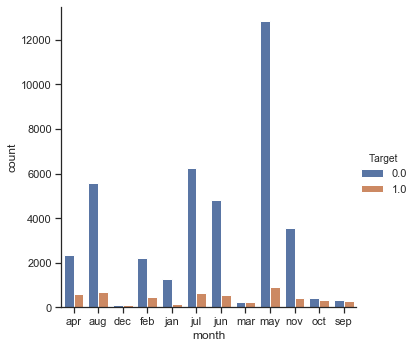

In [22]:
#plot month freq
sns.set(style="ticks", color_codes=True)
sns.catplot(x='month',hue='Target', kind="count", data=bank_df)

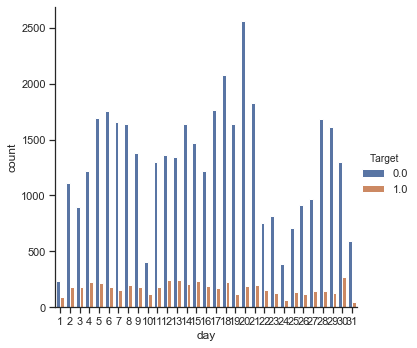

In [23]:
#plot target against day
#plot month freq
sns.set(style="ticks", color_codes=True)
sns.catplot(x='day',hue='Target', kind="count", data=bank_df)

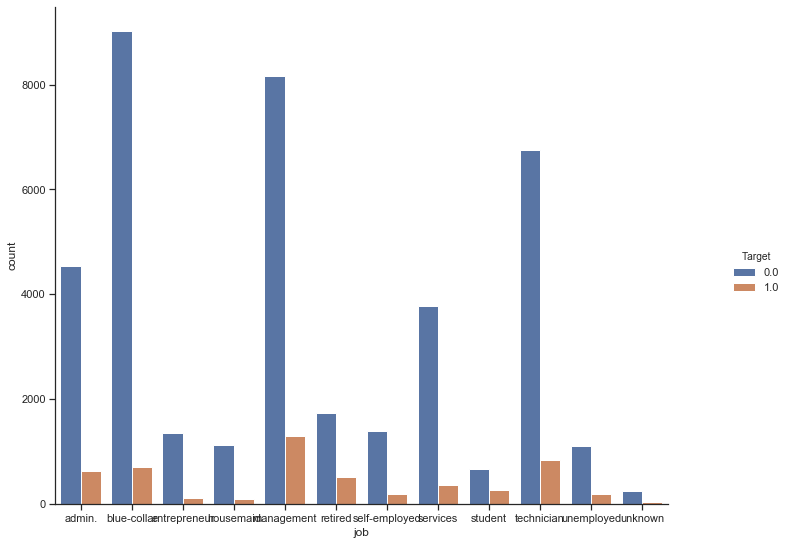

In [24]:
g = sns.catplot(x='job',hue='Target', kind="count", data=bank_df)
g.fig.set_figheight(8.27)
g.fig.set_figwidth(11.7)

### Looks like there is some impact of month on target (0/1) distribution.. Sep, Mar, oct seems good months

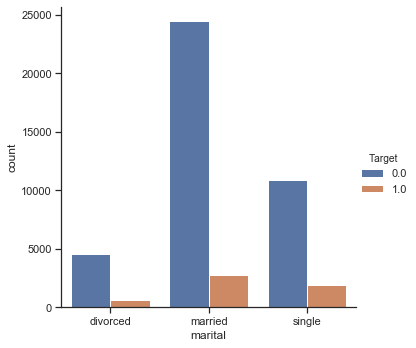

In [26]:
sns.catplot(x='marital',hue='Target', kind="count", data=bank_df)

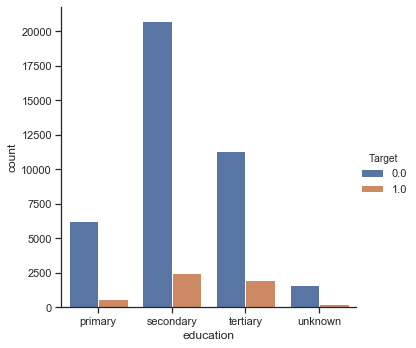

In [27]:
sns.catplot(x='education',hue='Target', kind="count", data=bank_df)

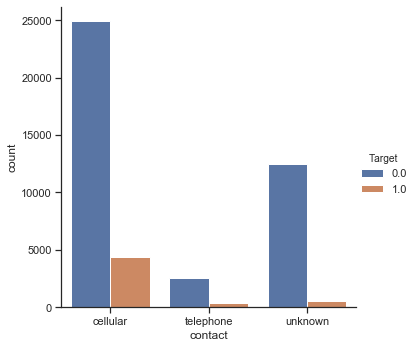

In [28]:
sns.catplot(x='contact',hue='Target', kind="count", data=bank_df)

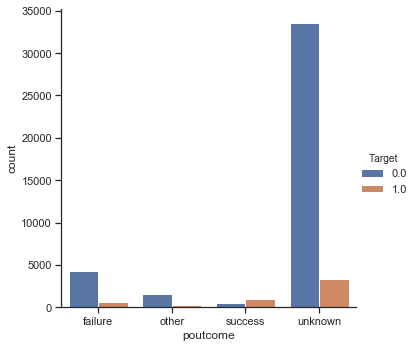

In [29]:
sns.catplot(x='poutcome',hue='Target', kind="count", data=bank_df)

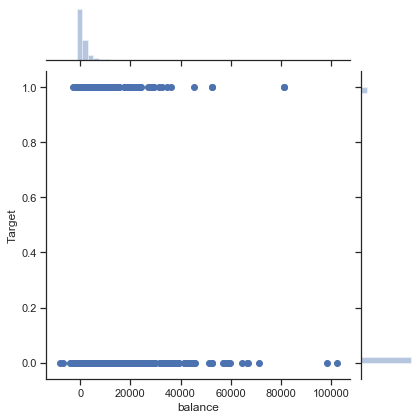

In [30]:
sns.jointplot(x="balance", y="Target", data=bank_df);

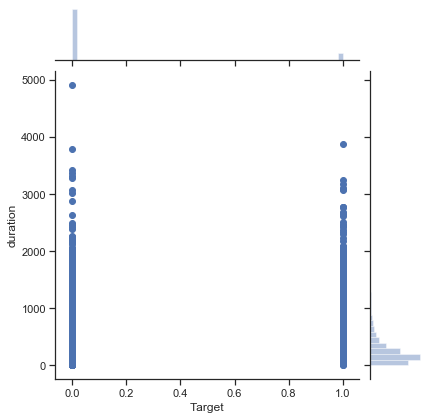

In [31]:
sns.jointplot(x='Target', y='duration', data = bank_df)

#### a.Checking the presence of missing values

In [34]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  float64 
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  float64 
 7   loan       45211 non-null  float64 
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  float64 
 13  pdays      45211 non-null  float64 
 14  previous   45211 non-null  float64 
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  float64 
dtypes: category(7), float64(10)
memory usage: 3.8 MB


In [35]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
default,"45,211.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
housing,"45,211.00",0.56,0.50,0.00,0.00,1.00,1.00,1.00
loan,"45,211.00",0.16,0.37,0.00,0.00,0.00,0.00,1.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00
Target,"45,211.00",0.12,0.32,0.00,0.00,0.00,0.00,1.00


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

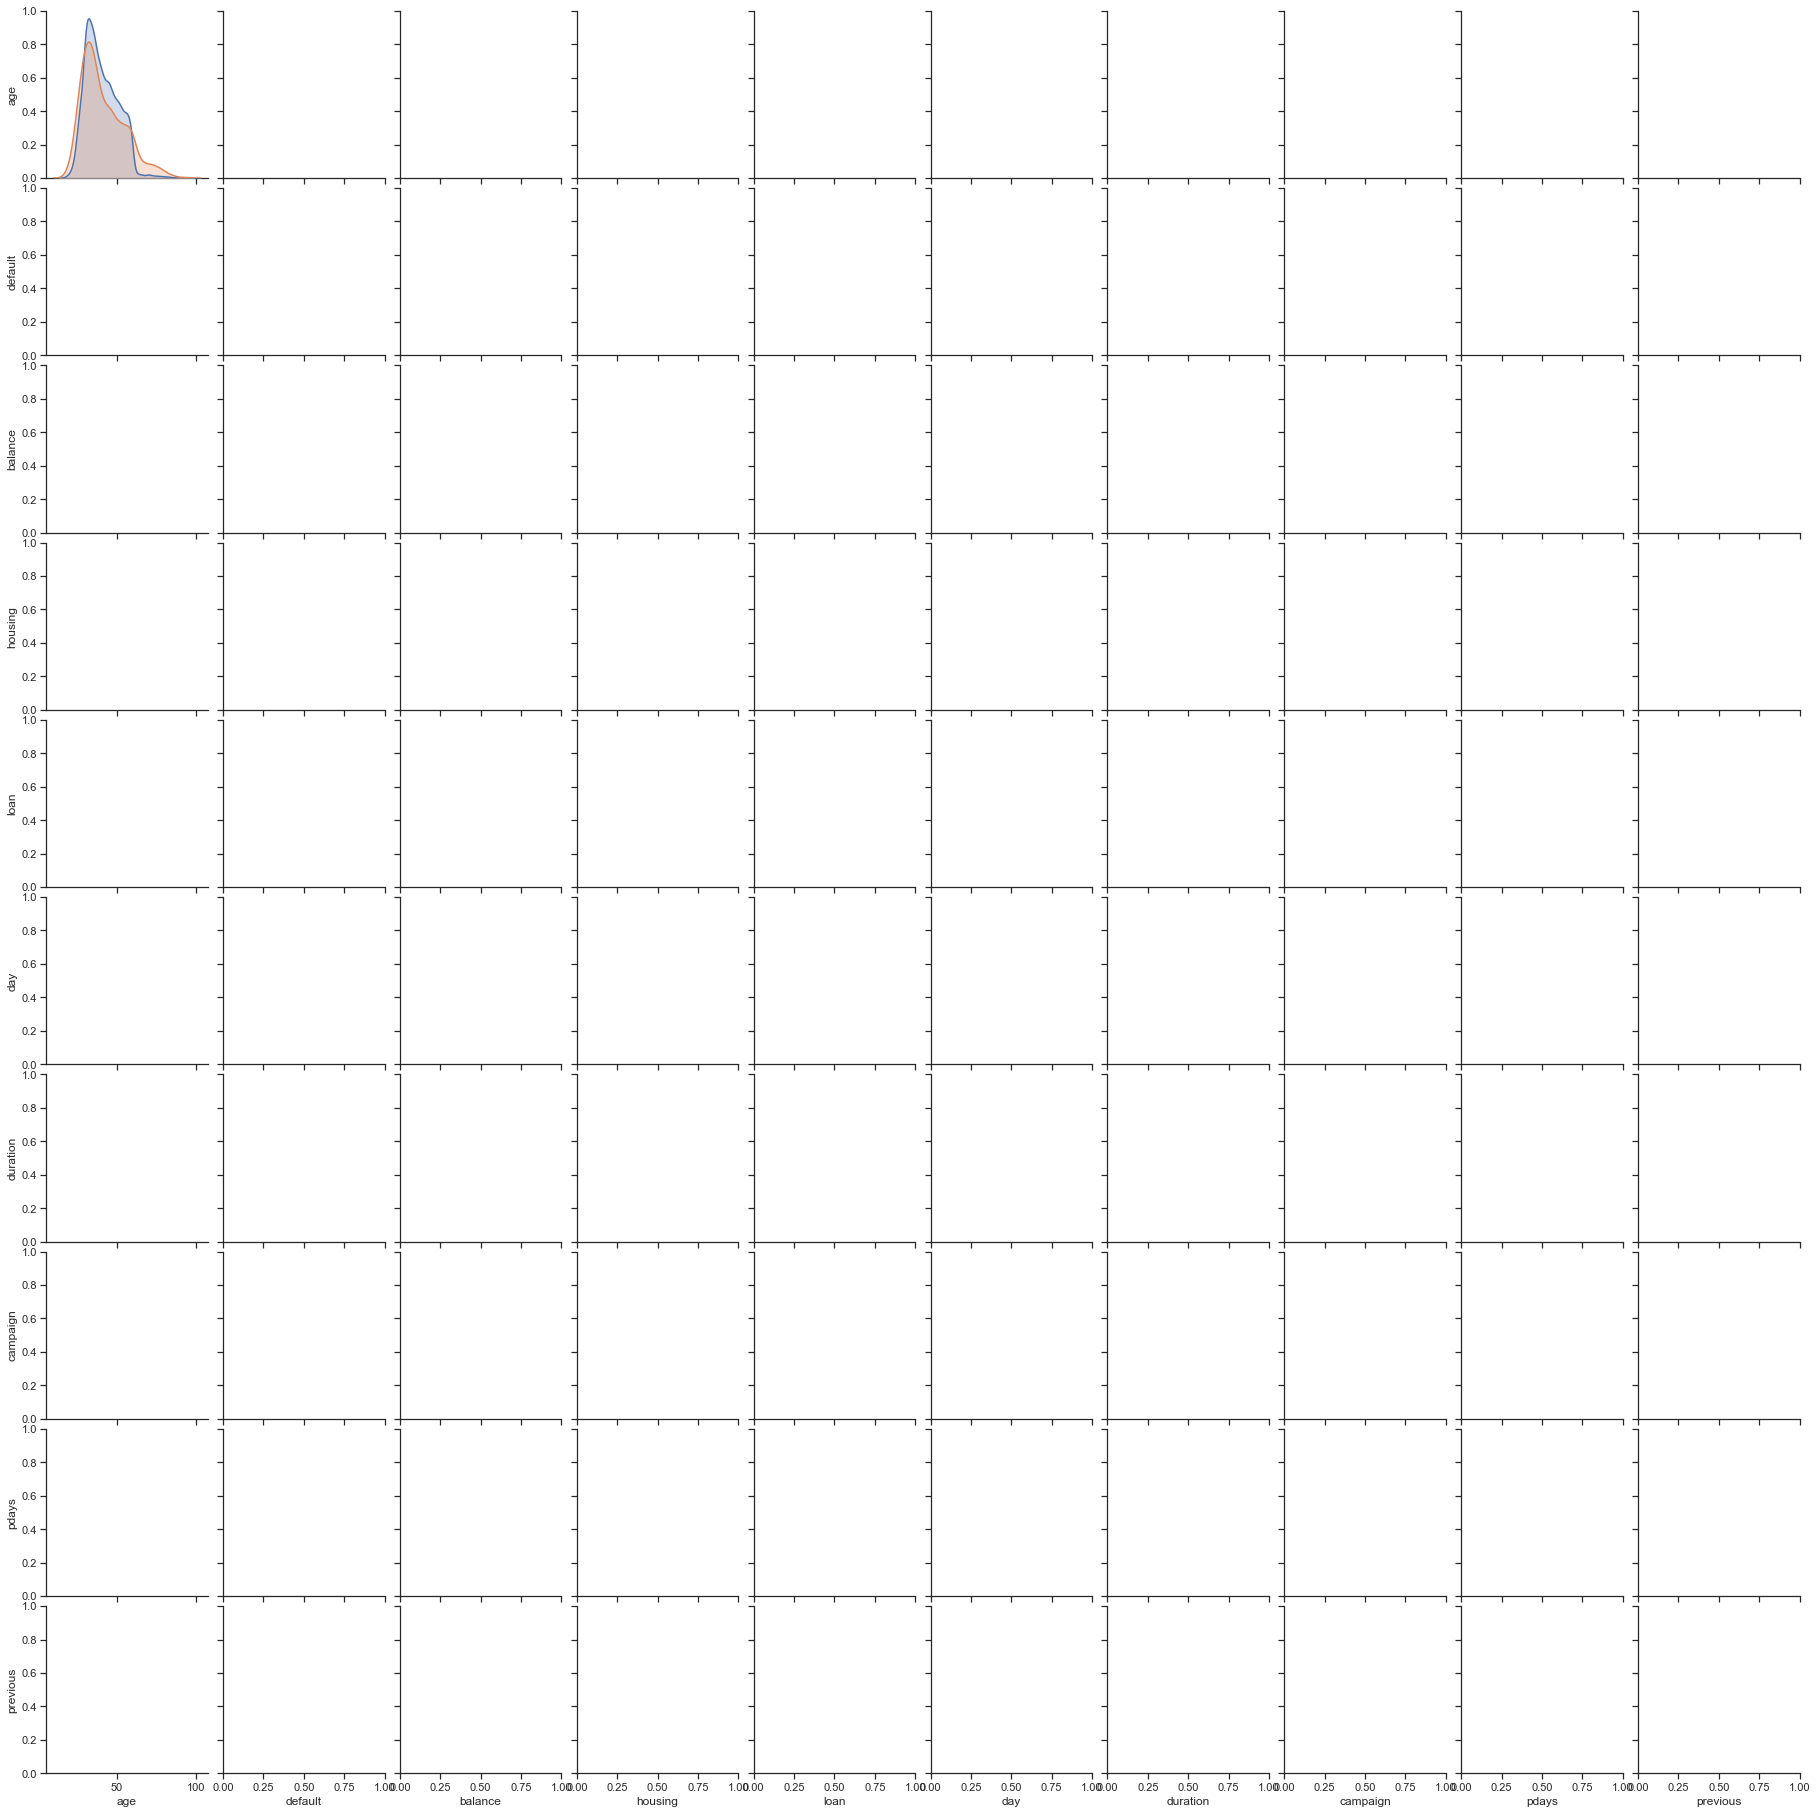

In [40]:
#just want to sns pair plot before all treatment
sns.pairplot(bank_df, hue="Target")

####  Checking the presence of outliers

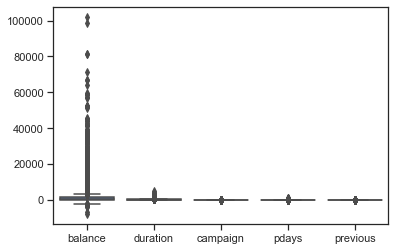

In [43]:
#We only take balance, duration, campaign, pdays, previous
bank_df_num_cols=['balance', 'duration','campaign', 'pdays', 'previous']
sns.boxplot(data=bank_df[bank_df_num_cols])

In [44]:
#just check outcomes for skew - looks like there is some skew
bank_df.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0.00,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1.00,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


### Ratio  of 0 : 1 == 0.8830151954170445: 0.1169848045829555 (0.883 : 0.117)

In [46]:
bank_df.corr()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
age,1.00,-0.02,0.10,-0.19,-0.02,-0.00,0.00,-0.02,0.00,0.03
default,-0.02,1.00,-0.07,-0.01,0.08,-0.01,0.02,-0.03,-0.02,-0.02
balance,0.10,-0.07,1.00,-0.07,-0.08,0.02,-0.01,0.00,0.02,0.05
housing,-0.19,-0.01,-0.07,1.00,0.04,0.01,-0.02,0.12,0.04,-0.14
loan,-0.02,0.08,-0.08,0.04,1.00,-0.01,0.01,-0.02,-0.01,-0.07
duration,-0.00,-0.01,0.02,0.01,-0.01,1.00,-0.08,-0.00,0.00,0.39
campaign,0.00,0.02,-0.01,-0.02,0.01,-0.08,1.00,-0.09,-0.03,-0.07
pdays,-0.02,-0.03,0.00,0.12,-0.02,-0.00,-0.09,1.00,0.45,0.10
previous,0.00,-0.02,0.02,0.04,-0.01,0.00,-0.03,0.45,1.00,0.09
Target,0.03,-0.02,0.05,-0.14,-0.07,0.39,-0.07,0.10,0.09,1.00


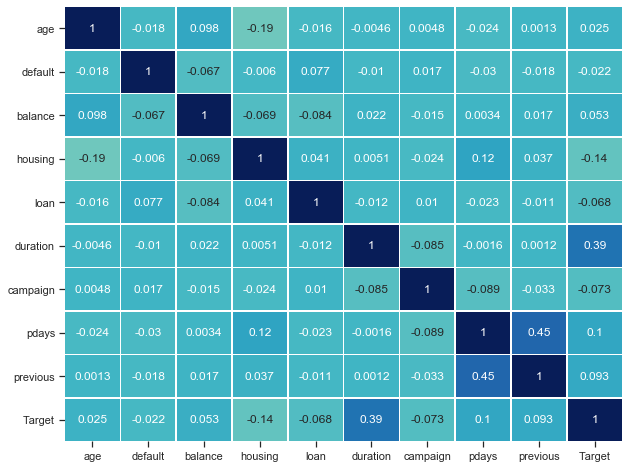

In [61]:
plt.figure(figsize=(10,8))

sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [55]:
#remove outliers
# https://stackoverflow.com/a/56725366
from scipy import stats

def drop_numerical_outliers(df, z_thresh):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

### Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [60]:
temp_dict = {'age':'category','job':'category','marital':'category','education':'category','default':'category','balance':'float64','housing':'category','loan':'category','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'category'}
bank_outlier_treat = bank_df.copy()
bank_outlier_treat = bank_outlier_treat.astype(temp_dict)
#bank_outlier_treat[(np.abs(stats.zscore(bank_outlier_treat)) < 3).all(axis=1)]
drop_numerical_outliers(bank_outlier_treat, 3)

TypeError: <lambda>() got an unexpected keyword argument 'reduce'

In [59]:
bank_outlier_treat.shape

(45211, 17)

In [62]:
bank_outlier_treat.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.00,management,married,tertiary,0.00,"2,143.00",1.00,0.00,unknown,5,may,261.00,1.00,-1.00,0.00,unknown,0.00
1,44.00,technician,single,secondary,0.00,29.00,1.00,0.00,unknown,5,may,151.00,1.00,-1.00,0.00,unknown,0.00
2,33.00,entrepreneur,married,secondary,0.00,2.00,1.00,1.00,unknown,5,may,76.00,1.00,-1.00,0.00,unknown,0.00
3,47.00,blue-collar,married,unknown,0.00,"1,506.00",1.00,0.00,unknown,5,may,92.00,1.00,-1.00,0.00,unknown,0.00
4,33.00,unknown,single,unknown,0.00,1.00,0.00,0.00,unknown,5,may,198.00,1.00,-1.00,0.00,unknown,0.00
5,35.00,management,married,tertiary,0.00,231.00,1.00,0.00,unknown,5,may,139.00,1.00,-1.00,0.00,unknown,0.00
6,28.00,management,single,tertiary,0.00,447.00,1.00,1.00,unknown,5,may,217.00,1.00,-1.00,0.00,unknown,0.00
7,42.00,entrepreneur,divorced,tertiary,1.00,2.00,1.00,0.00,unknown,5,may,380.00,1.00,-1.00,0.00,unknown,0.00
8,58.00,retired,married,primary,0.00,121.00,1.00,0.00,unknown,5,may,50.00,1.00,-1.00,0.00,unknown,0.00
9,43.00,technician,single,secondary,0.00,593.00,1.00,0.00,unknown,5,may,55.00,1.00,-1.00,0.00,unknown,0.00


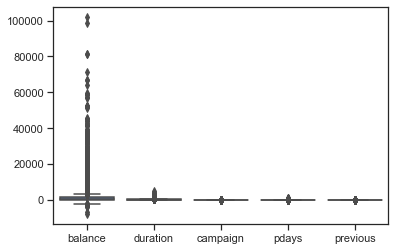

In [63]:
sns.boxplot(data=bank_outlier_treat[bank_df_num_cols])

In [64]:
#type_dict = {'age':'float64','job':'object','marital':'object','education':'object','default':'int64','balance':'float64','housing':'int64','loan':'int64','contact':'object','day':'int64','month':'object','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'object','Target':'int64'}
type_dict = {'age':'float64','job':'category','marital':'category','education':'category','default':'float64','balance':'float64','housing':'float64','loan':'float64','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'float64'}
bank_outlier_treat = bank_outlier_treat.astype(dtype=type_dict)

In [65]:
bank_outlier_treat.dtypes

age           float64
job          category
marital      category
education    category
default       float64
balance       float64
housing       float64
loan          float64
contact      category
day          category
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target        float64
dtype: object

In [66]:
bank_df_conv = bank_outlier_treat.copy()

In [67]:
bank_df_conv.dtypes

age           float64
job          category
marital      category
education    category
default       float64
balance       float64
housing       float64
loan          float64
contact      category
day          category
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target        float64
dtype: object

In [68]:
bank_df_conv.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.00,management,married,tertiary,0.00,"2,143.00",1.00,0.00,unknown,5,may,261.00,1.00,-1.00,0.00,unknown,0.00
1,44.00,technician,single,secondary,0.00,29.00,1.00,0.00,unknown,5,may,151.00,1.00,-1.00,0.00,unknown,0.00
2,33.00,entrepreneur,married,secondary,0.00,2.00,1.00,1.00,unknown,5,may,76.00,1.00,-1.00,0.00,unknown,0.00
3,47.00,blue-collar,married,unknown,0.00,"1,506.00",1.00,0.00,unknown,5,may,92.00,1.00,-1.00,0.00,unknown,0.00
4,33.00,unknown,single,unknown,0.00,1.00,0.00,0.00,unknown,5,may,198.00,1.00,-1.00,0.00,unknown,0.00
5,35.00,management,married,tertiary,0.00,231.00,1.00,0.00,unknown,5,may,139.00,1.00,-1.00,0.00,unknown,0.00
6,28.00,management,single,tertiary,0.00,447.00,1.00,1.00,unknown,5,may,217.00,1.00,-1.00,0.00,unknown,0.00
7,42.00,entrepreneur,divorced,tertiary,1.00,2.00,1.00,0.00,unknown,5,may,380.00,1.00,-1.00,0.00,unknown,0.00
8,58.00,retired,married,primary,0.00,121.00,1.00,0.00,unknown,5,may,50.00,1.00,-1.00,0.00,unknown,0.00
9,43.00,technician,single,secondary,0.00,593.00,1.00,0.00,unknown,5,may,55.00,1.00,-1.00,0.00,unknown,0.00


In [69]:
#src :: https://stackoverflow.com/a/37293283
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [70]:
#one hot encode job, marital, education, poutcome, education, contact --
#bank_df_onehot = pd.get_dummies(bank_df_conv, columns=['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome'], drop_first=False)

#drop Day & Month
#bank_df_conv_drop = bank_df_conv.drop(['day'], axis = 1) 
#bank_df_conv_drop = bank_df_conv_drop.drop(['month'], axis = 1) 
#bank_df_onehot = pd.get_dummies(bank_df_conv_drop, columns=['job', 'marital', 'education', 'contact', 'poutcome', 'month'], drop_first=False)

#for col in ['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome']:
#    bank_df[col] = bank_df[col].astype('category')
#bank_df_onehot.head(10)

bank_df_conv_encoded = dummyEncode(bank_df_conv)
bank_df_conv_encoded.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.00,4,1,2,0.00,"2,143.00",1.00,0.00,2,4,8,261.00,1.00,-1.00,0.00,3,0.00
1,44.00,9,2,1,0.00,29.00,1.00,0.00,2,4,8,151.00,1.00,-1.00,0.00,3,0.00
2,33.00,2,1,1,0.00,2.00,1.00,1.00,2,4,8,76.00,1.00,-1.00,0.00,3,0.00
3,47.00,1,1,3,0.00,"1,506.00",1.00,0.00,2,4,8,92.00,1.00,-1.00,0.00,3,0.00
4,33.00,11,2,3,0.00,1.00,0.00,0.00,2,4,8,198.00,1.00,-1.00,0.00,3,0.00
5,35.00,4,1,2,0.00,231.00,1.00,0.00,2,4,8,139.00,1.00,-1.00,0.00,3,0.00
6,28.00,4,2,2,0.00,447.00,1.00,1.00,2,4,8,217.00,1.00,-1.00,0.00,3,0.00
7,42.00,2,0,2,1.00,2.00,1.00,0.00,2,4,8,380.00,1.00,-1.00,0.00,3,0.00
8,58.00,5,1,0,0.00,121.00,1.00,0.00,2,4,8,50.00,1.00,-1.00,0.00,3,0.00
9,43.00,9,2,1,0.00,593.00,1.00,0.00,2,4,8,55.00,1.00,-1.00,0.00,3,0.00


In [71]:
bank_df_conv_encoded.dtypes

age          float64
job            int32
marital        int32
education      int32
default      float64
balance      float64
housing      float64
loan         float64
contact        int32
day            int64
month          int32
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int32
Target       float64
dtype: object

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

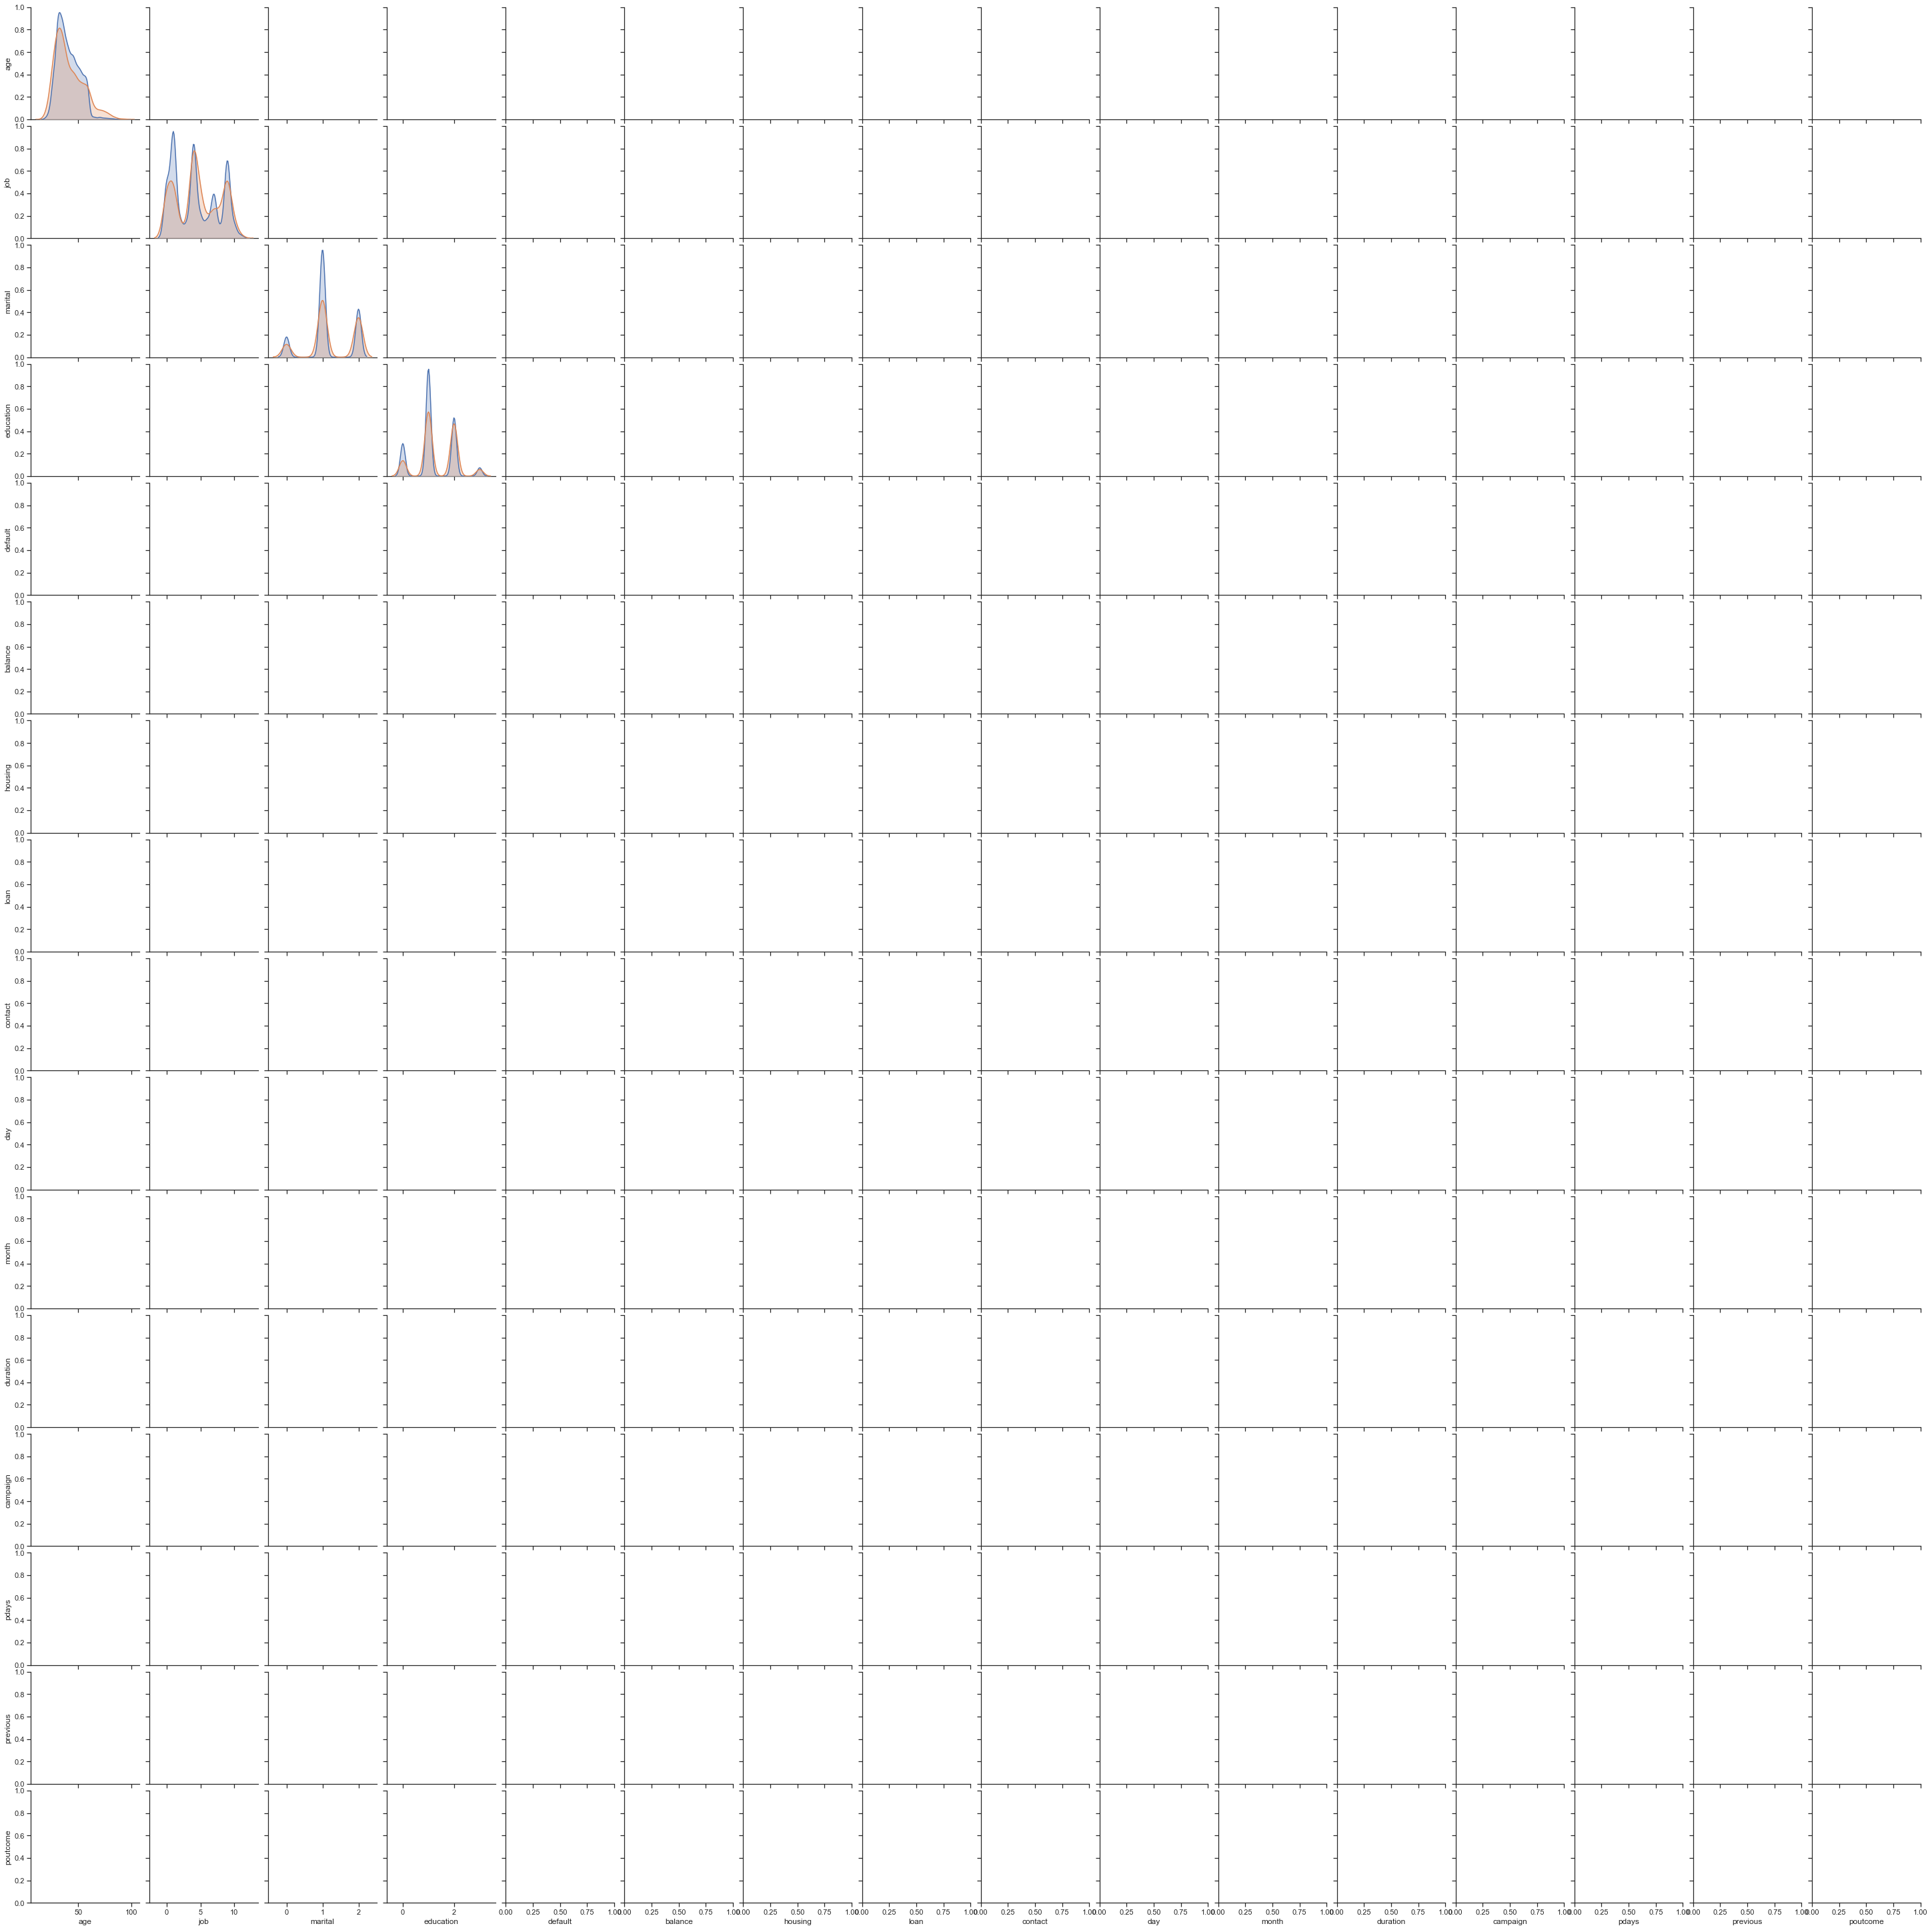

In [72]:
#pair plot to check data spread -- takes too long
#sns.pairplot(bank_df_onehot, hue="Target")
sns.pairplot(bank_df_conv_encoded, hue="Target")

In [75]:
### Train a few standard classification algorithms, note and comment on their performances along different metrics.

In [74]:
## Define X and y variables
X = bank_df_conv_encoded.drop('Target', axis=1)
y = bank_df_conv_encoded[['Target']]
y=y.astype('int64')

##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [76]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train.values.ravel())

C:\Users\khimy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[21939  5970]
 [  932  2806]]


In [78]:
lr_train_score = logreg.score(X_train,y_train)
print (lr_train_score)

0.7819066578190665


In [79]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[9399 2614]
 [ 410 1141]]


In [80]:
lr_test_score = logreg.score(X_test,y_test)
print (lr_test_score)

0.7770569153641993


In [81]:
lr_cf_matrix = metrics.classification_report(y_test, pred_test)
print("Logistic Regression Metrics = \n", lr_cf_matrix)

Logistic Regression Metrics = 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     12013
           1       0.30      0.74      0.43      1551

    accuracy                           0.78     13564
   macro avg       0.63      0.76      0.65     13564
weighted avg       0.88      0.78      0.81     13564



## Summary 

 |Model Name         | Training Accuracy | Testing Accuracy | precision   | recall      | f1 Score    | support    |
 |------------------ | ----------------- | ---------------- | ----------- | ----------- | ----------- | ---------- |
 |Logistic Regrsion  |0.78190|0.777|0.32|0.80|0.46|1268
    
## Training seems to go well but test data seemes to the model good especially for class 1. 

## Decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

In [86]:
#5training score
dt_model.score(X_train , y_train)

1.0

In [87]:
#Testing score
dt_model.score(X_test , y_test)

0.8775434974933648

In [88]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    0  3738]]


In [89]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11156   857]
 [  804   747]]


In [90]:
print("Decision Tree MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Decision Tree MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.47      0.48      0.47      1551

    accuracy                           0.88     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [91]:
#pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).to_csv ('vgk.csv')
print ("Feature importance = \n", pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feature importance = 
            Imp
age       0.09
job       0.04
marital   0.01
education 0.02
default   0.00
balance   0.11
housing   0.03
loan      0.01
contact   0.05
day       0.08
month     0.10
duration  0.31
campaign  0.03
pdays     0.06
previous  0.02
poutcome  0.02


### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight="balanced", max_depth = 20, min_samples_leaf=3)
rfcl = rfcl.fit(X_train, y_train.values.ravel())
pred_train = rfcl.predict(X_train)
pred_test= rfcl.predict(X_test)
#rfcl.score(X_test , y_test)

In [94]:
#5training score
rfcl.score(X_train , y_train)

0.9649887825070307

In [95]:
#Testing score
rfcl.score(X_test , y_test)

0.8987024476555588

In [96]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[26859  1050]
 [   58  3680]]


In [97]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11155   858]
 [  516  1035]]


In [99]:
print("Random Forest MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Random Forest MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     12013
           1       0.55      0.67      0.60      1551

    accuracy                           0.90     13564
   macro avg       0.75      0.80      0.77     13564
weighted avg       0.91      0.90      0.90     13564



In [101]:
### Adaboost

In [100]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train.values.ravel())
pred_train = abcl.predict(X_train)
pred_test = abcl.predict(X_test)

In [102]:
#training score
abcl.score(X_train , y_train)

0.890542547476854

In [103]:
#Testing score
abcl.score(X_test , y_test)

0.8891919787673253

In [104]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[26888  1021]
 [ 2443  1295]]


In [105]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11571   442]
 [ 1061   490]]


In [106]:
print("AdaBoost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

AdaBoost MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     12013
           1       0.53      0.32      0.39      1551

    accuracy                           0.89     13564
   macro avg       0.72      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



In [ ]:
## GradientBoost

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train.values.ravel())
pred_train = gbcl.predict(X_train)
pred_test = gbcl.predict(X_test)
#gbcl.score(X_test , y_test)

In [108]:
#5training score
gbcl.score(X_train , y_train)

0.8984421904129933

In [109]:
#Testing score
gbcl.score(X_test , y_test)

0.898997345915659

In [110]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27470   439]
 [ 2775   963]]


In [111]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11819   194]
 [ 1176   375]]


In [112]:
print("Gradient Boost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Gradient Boost MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     12013
           1       0.66      0.24      0.35      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.61      0.65     13564
weighted avg       0.88      0.90      0.88     13564



In [113]:
## Bagging

In [114]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .6, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train.values.ravel())
pred_train = bgcl.predict(X_train)
pred_test = bgcl.predict(X_test)
#bgcl.score(X_test , y_test)

In [115]:
#5training score
bgcl.score(X_train , y_train)

0.9713084968559421

In [116]:
#Testing score
bgcl.score(X_test , y_test)

0.898849896785609

In [117]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27768   141]
 [  767  2971]]


In [118]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11576   437]
 [  935   616]]


In [119]:
print("Bagging MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Bagging MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     12013
           1       0.58      0.40      0.47      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



### 7. Compare performances of all the models

 |Model Name         | Training Accuracy | Testing Accuracy | precision   | recall      | f1 Score    | support    |
 |------------------ | ----------------- | ---------------- | ----------- | ----------- | ----------- | ---------- |
 |Logistic Regrsion  |0.8020|0.8049|0.32|0.80|0.46|1551                                                            |                                                            |
 |DecisionTree        |1.0|0.8872|0.46|0.47|0.47|1551                                                             |
 |Random Forest          |0.9601|0.8962|0.50|0.58|0.54|1551                                                        |
 |Adaboost              |0.9029|0.9030|0.57|0.28|0.35|1551                                                         |
 |Gradient Boost        |0.9083|0.9074|0.66|0.24|0.29|1551                                                        |
 |Bagging             |0.9713|0.8988|0.58|0.4|0.47|1551                                                           |    

In [ ]:
### Conclusion

1. class skew seems to affect learning and messes it up
2. Training & accuracies are very high but precision recall f1 for target class 1 is not very satisfactory
3. Ada, Gradient, XG boosting seem to perform quite well even for precsion recall and F1
4. Gradient boost has highest precision, GX Boost seemsto have a better rounded off performance